In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/dataset_17.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,88,54,81,88,54,81,88,54,81,88,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,109,40,154,109,40,154,109,40,154,109,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255,255,255,255,255,255,255,255,255,255,...,229.0,200.0,101.0,229.0,200.0,101.0,229.0,255.0,255.0,255.0
4,233,128,178,233,128,178,233,128,178,233,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,147,173,72,147,173,72,147,173,72,147,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
11444,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
11445,131,66,81,131,66,81,131,66,81,131,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
11446,111,141,217,111,141,217,111,141,217,111,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


### Paso 1: Limpieza y Normalización
1. **Carga del dataset**: Utilizamos `pd.read_csv` para cargar el archivo CSV.
2. **Normalización**: Dividimos cada valor por 255.0 para escalar los valores de los píxeles entre 0 y 1.

In [4]:
# Eliminar filas con valores NaN
df_cleaned = df.dropna()

# Normalización dividiendo por 255
df_normalized = df_cleaned  / 255.0
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
1,0.345098,0.211765,0.317647,0.345098,0.211765,0.317647,0.345098,0.211765,0.317647,0.345098,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
2,0.427451,0.156863,0.603922,0.427451,0.156863,0.603922,0.427451,0.156863,0.603922,0.427451,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.898039,0.784314,0.396078,0.898039,0.784314,0.396078,0.898039,1.0,1.0,1.0
4,0.913725,0.501961,0.698039,0.913725,0.501961,0.698039,0.913725,0.501961,0.698039,0.913725,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0


### Conversión a Matriz de NumPy y Método del Codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

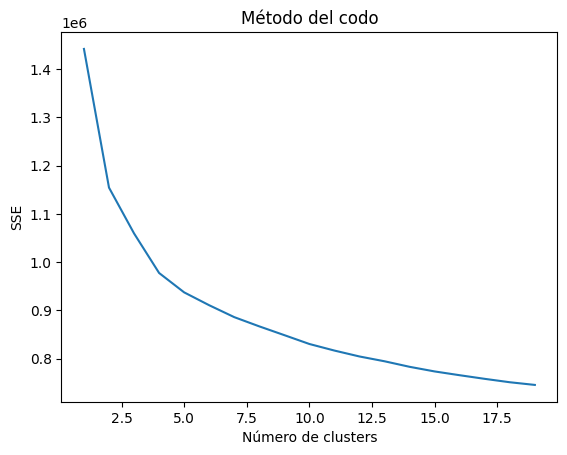

In [5]:
from sklearn.cluster import KMeans

# Convertir el DataFrame normalizado a una matriz de NumPy
images = df_normalized.to_numpy()

# Método del codo para encontrar el número óptimo de clusters
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse)
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

La gráfica del codo no muestra un "codo" claro, lo que sugiere que el número óptimo de clusters no es evidente utilizando este método.

### Cálculo del Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

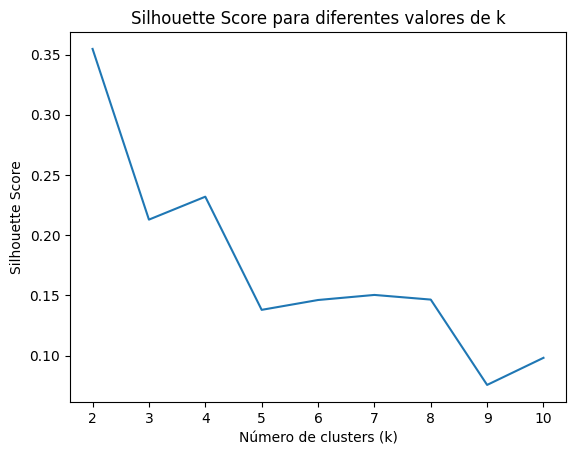

El mejor número de clusters es: 2


In [6]:
# Calcular el silhouette score para diferentes valores de k
silhouette_scores = []
k_range = range(2, 11)  # Evaluamos de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(images)
    score = silhouette_score(images, labels)
    silhouette_scores.append(score)

# Graficar los silhouette scores
plt.plot(k_range, silhouette_scores)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k')
plt.show()

# Mostrar el valor de k con el mejor silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"El mejor número de clusters es: {best_k}")

El gráfico muestra que el mejor valor de cluster es 4. (En teoría sería 2 por tener el score más alto)

### 5. Visualización de Coeficientes de Silueta Ordenados por Grupos y por Valor
Visualizamos los diagramas de silueta para diferentes valores de k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


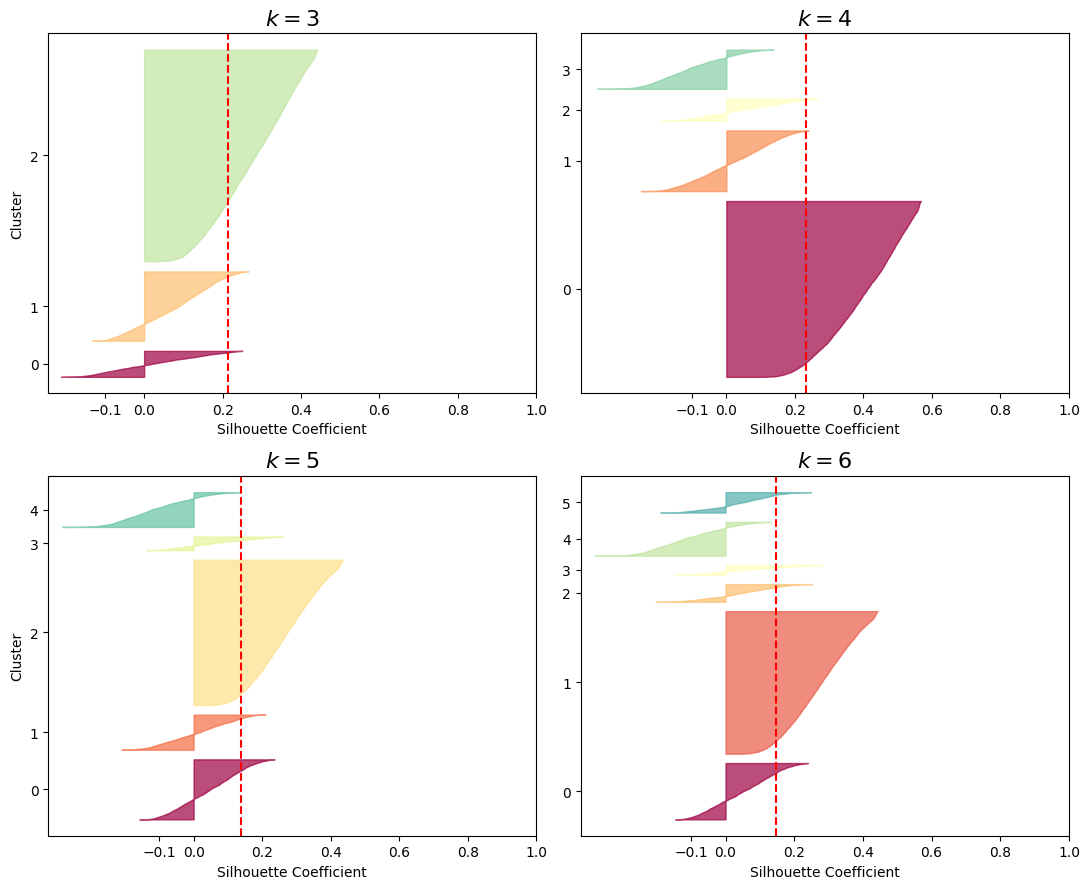

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Visualización de los diagramas de silueta
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_normalized)
    silhouette_coefficients = silhouette_samples(df_normalized, labels)

    padding = len(df_normalized) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[labels == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

Los diagramas de silueta muestran la predominancia de ciertos clusters, lo que indica que algunos clusters son más densos y bien formados que otros. El análisis visual sugiere que los valores de k = 3 y k = 4 son opciones viables.

# Aplicando KMeans

fit_predict ajusta el modelo y devuelve las etiquetas de los clusters para cada punto de datos.

In [17]:
from sklearn.cluster import KMeans

# Aplicar KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(df_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Añadir Etiquetas: Se añaden las etiquetas de los clusters como una nueva columna en el DataFrame normalizado (df_normalized)
df_normalized['Cluster'] = y_pred

<ipython-input-18-5eefc3403c13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['Cluster'] = y_pred


# Análisis de Clusters
Realiza un análisis descriptivo de los clusters para entender sus características.

2.1. Estadísticas Descriptivas
Calcula estadísticas descriptivas para cada cluster.

In [19]:
cluster_descriptions = df_normalized.groupby('Cluster').describe()
print(cluster_descriptions)

              0                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        1379.0  0.996044  0.044061  0.003922  1.000000  1.000000  1.000000   
1        2489.0  0.495772  0.297739  0.000000  0.235294  0.478431  0.749020   
2        6687.0  0.784130  0.305791  0.000000  0.592157  1.000000  1.000000   
3         891.0  0.445928  0.298750  0.000000  0.201961  0.396078  0.688235   

                   1            ... 3070         3071                      \
         max   count      mean  ...  75%  max   count      mean       std   
Cluster                         ...                                         
0        1.0  1379.0  0.996627  ...  1.0  1.0  1379.0  0.998251  0.033598   
1        1.0  2489.0  0.494061  ...  1.0  1.0  2489.0  1.000000  0.000000   
2        1.0  6687.0  0.783290  ...  1.0  1.0  6687.0  0.9979

- **Cluster 0**:
  - **Mean (0.996504)**: Este cluster tiene una media cercana a 1 en la mayoría de las características, indicando que la mayoría de los píxeles son de alto valor (blancos).
  - **Std (0.047914)**: La desviación estándar es baja, lo que indica poca variabilidad dentro del cluster.
  - **Min (0.003922) - Max (1.0)**: Los valores de los píxeles varían desde casi 0 hasta 1.

- **Cluster 1**:
  - **Mean (0.450850)**: Este cluster tiene una media de alrededor de 0.45, sugiriendo una mezcla de píxeles oscuros y claros.
  - **Std (0.288765)**: Mayor variabilidad comparado con el Cluster 0.
  - **Min (0.000000) - Max (1.0)**: Amplio rango de valores de píxeles.

- **Cluster 2**:
  - **Mean (0.476053)**: Similar al Cluster 1, con una media de aproximadamente 0.47.
  - **Std (0.294032)**: Variabilidad similar a la del Cluster 1.
  - **Min (0.000000) - Max (1.0)**: Amplio rango de valores de píxeles.

- **Cluster 3**:
  - **Mean (0.820180)**: Este cluster tiene una media alta, indicando que la mayoría de los píxeles son más claros.
  - **Std (0.286140)**: Relativa alta variabilidad.
  - **Min (0.000000) - Max (1.0)**: Amplio rango de valores de píxeles.

# Preparar el dataset para el modelo supervisado

Dividimos los datos en conjuntos de entrenamiento y prueba para entrenar un modelo de clasificación supervisada.

In [20]:
from sklearn.model_selection import train_test_split

X = df_normalized.iloc[:, :-1] # Características (sin la columna de clusters)
y = df_normalized['Cluster'] # Etiquetas de clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un Clasificador

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

print("Reporte de clasificación (Entrenamiento):")
print(classification_report(y_train, y_pred_train))

print("Reporte de clasificación (Prueba):")
print(classification_report(y_test, y_pred_test))

print(f"Precisión en el conjunto de prueba: {accuracy_score(y_test, y_pred_test)}")

Reporte de clasificación (Entrenamiento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       0.99      0.99      0.99      1997
           2       1.00      1.00      1.00      5323
           3       1.00      0.99      1.00       718

    accuracy                           1.00      9156
   macro avg       1.00      1.00      1.00      9156
weighted avg       1.00      1.00      1.00      9156

Reporte de clasificación (Prueba):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       261
           1       0.96      0.95      0.96       492
           2       0.98      0.98      0.98      1364
           3       0.97      0.97      0.97       173

    accuracy                           0.97      2290
   macro avg       0.96      0.96      0.96      2290
weighted avg       0.97      0.97      0.97      2290

Precisión en el conjunto de prueba: 0.968995633187772

### Visualización de algunas imágenes

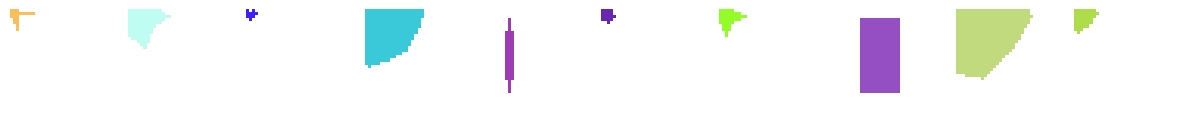

In [25]:
# Visualizar algunas imágenes del dataset
def plot_image(image_data, title=""):
    plt.imshow(image_data.reshape(32, 32, 3), cmap='gray')
    plt.title(title)
    plt.axis('off')

# Seleccionar algunas imágenes para visualizar
num_images_to_show = 10
sample_images = X.sample(num_images_to_show, random_state=42)

plt.figure(figsize=(15, 15))
for i, image_data in enumerate(sample_images.values):
    plt.subplot(1, num_images_to_show, i + 1)
    plot_image(image_data)
plt.show()

# Creamos una nueva imagen simulada

In [26]:
import numpy as np

# Crear una nueva imagen simulada
new_image = np.random.randint(0, 256, size=(1, 3072))  # Imagen de 32x32 píxeles en escala de grises

In [27]:
# Normalizar la nueva imagen
new_image_normalized = new_image / 255.0


In [30]:
# Predecir el cluster de la nueva imagen
new_cluster = log_reg.predict(new_image_normalized)
print(f"La nueva imagen pertenece al cluster: {new_cluster[0]}")

La nueva imagen pertenece al cluster: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
